## Section 1: Introduction
In this Notebook, I present my analysis of the Titanic Data

I investigate the relationship between age, gender, passenger class and the survival rate. 
- How did the survival rate vary by age?
- How did survival rates vary per passenger class?
- How did survival rates vary for males and females in each passenger class? Between passenger classes?

Resources used
- https://discussions.udacity.com/t/titanic-pclass-grouped-data-draw-a-hist/172594/13
- https://www.kaggle.com/benhamner/titanic/python-seaborn-pairplot-example/code
- http://stackoverflow.com/questions/5642457/how-does-python-numpy-where-work
- https://discussions.udacity.com/t/help-with-plotting/161847
- https://discussions.udacity.com/t/p2-titanic-data-set-project-unable-to-fix-data-errors-in-fare-column/170554
- http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb

## Section 2: Load in Data from CSVs and Examine the Dataset

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [4]:
# Load CSV File
titanic_original = pd.read_csv('titanic_data.csv')

### Examine Dataset

In [5]:
# Examine the dataset
titanic_original

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


#### Problem-free Data:
- All passenger id numbers are included.
- All passenger's survival is accounted for.
- All passenger's Pclass is accounted for
- Every passenger's SibSp field is filled
- As it is for Parch
- Fare information present for all passengers
- All passengers are classified by gender
- Some passengers paid a fare of 0. This might be a problem, but is a possibility and I will keep this data.

In [6]:
titanic_original.describe()

C:\Users\IThomas\Anaconda2\lib\site-packages\numpy\lib\function_base.py:3834: RuntimeWarning: Invalid value encountered in percentile
  RuntimeWarning)


,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,NaN,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,NaN,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,NaN,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


####  Columns where there are problems
- 177 passengers without age information. Their age value is NaN.   
- 2 passenger's embarkation data not accounted for.
- Do not intend to use name of passenger, cabin number or ticket number so will not check these fields

#### Handling Missing Values
Clean up dataset by removing passengers with no age information.

In [7]:
titanic = titanic_original[pd.notnull(titanic_original['Age'])]
titanic

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C
10,11,1,3,"Sandstrom, Miss. Marguerite Rut",female,4.0,1,1,PP 9549,16.7000,G6,S


## Section 3: Investigating Data

### Data Wrangling Phase
Use charts to depict the distribution of each feature among the passengers for new cleaned dataset

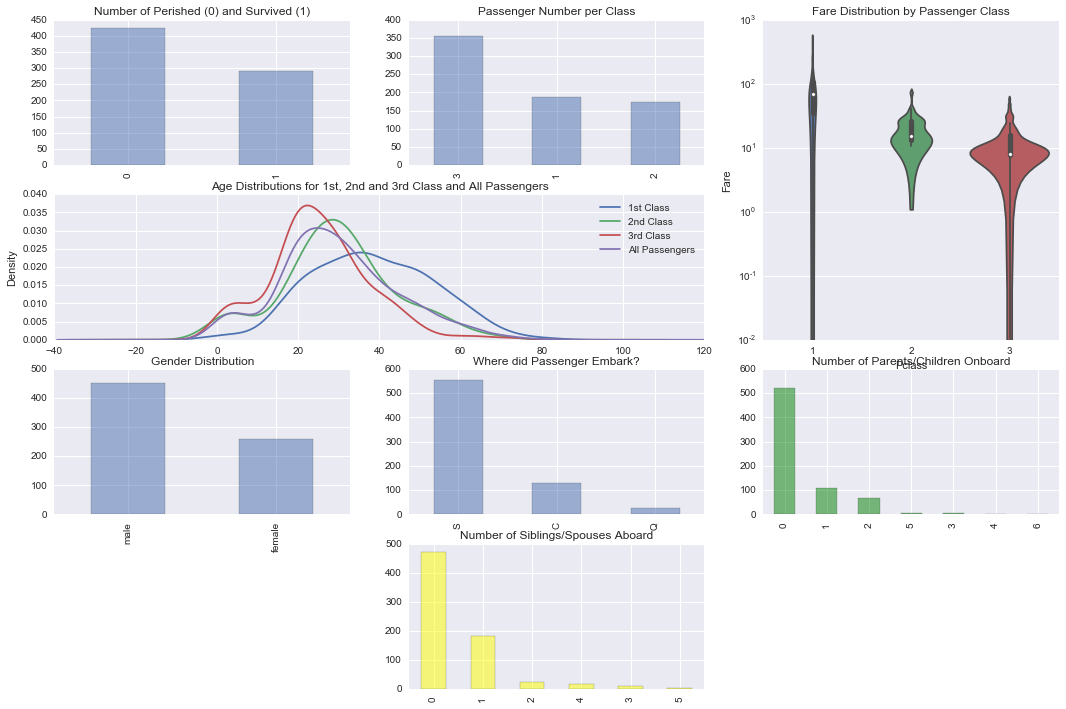

In [8]:
## Note to reviewer: This plot was inspired by one I saw in 
## http://nbviewer.jupyter.org/github/agconti/kaggle-titanic/blob/master/Titanic.ipynb
## I have understood it, and changed and expanded the plot.

# create graphs
fig = plt.figure(figsize = (18,12))
alpha_bar = 0.5

# plot first graph
# Survival Distribution
ax1 = plt.subplot2grid((4,3),(0,0))
titanic["Survived"].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Number of Perished (0) and Survived (1)')

# Plot second graph
# Passenger Class Distribution 
ax2 = plt.subplot2grid((4,3),(0,1))
titanic["Pclass"].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title("Passenger Number per Class")

# plot third graph
# Fare Distribution
ax3 = plt.subplot2grid((4,3), (0,2), rowspan = 2)
sns.violinplot(x = titanic['Pclass'], y = titanic['Fare']).set_yscale('log')
plt.title('Fare Distribution by Passenger Class')

# plot fourth graph
ax4 = plt.subplot2grid((4,3),(1,0), colspan = 2)
titanic[titanic['Pclass'] == 1]['Age'].plot(kind = 'kde')
titanic[titanic['Pclass'] == 2]['Age'].plot(kind = 'kde')
titanic[titanic['Pclass'] == 3]['Age'].plot(kind = 'kde')
titanic['Age'].plot(kind = 'kde')
plt.title('Age Distributions for 1st, 2nd and 3rd Class and All Passengers')
plt.legend(('1st Class', '2nd Class', '3rd Class', 'All Passengers'), loc = 'best')

# plot fifth graph
ax5 = plt.subplot2grid((4,3), (2,0))
titanic['Sex'].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Gender Distribution')

# plot sixth graph
ax6 = plt.subplot2grid((4,3), (2,1))
titanic['Embarked'].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Where did Passenger Embark?')

# plot seventh graph
ax7 = plt.subplot2grid((4,3), (2,2))
titanic['Parch'].value_counts().plot(kind = 'bar', color = 'green', alpha = alpha_bar)
plt.title('Number of Parents/Children Onboard')

# plot eighth graph
ax7 = plt.subplot2grid((4,3), (3,1))
titanic['SibSp'].value_counts().plot(kind = 'bar', color = 'yellow', alpha = alpha_bar)
plt.title('Number of Siblings/Spouses Aboard')



#### Some statistics to accompany the charts above

In [9]:
# Statistics
print "Survival Rate Statistics"
print (titanic['Survived'].value_counts())

print "\nPassenger Class Distribution"
print (titanic['Pclass'].value_counts())

print "\nAge Distribution"
print titanic['Age'].describe()

print "\nFare Distribution"
print titanic['Fare'].describe()

print "\nGender Distribution Statistics"
print (titanic['Sex'].value_counts())

print "\nWhere did Passengers Embark?"
print titanic['Embarked'].value_counts()

print "\nNumber of Parents/Children Onboard"
print titanic['Parch'].value_counts()

print "\nNumber of Siblings/Spouses Onboard"
print titanic['SibSp'].value_counts()

Survival Rate Statistics
0    424
1    290
Name: Survived, dtype: int64

Passenger Class Distribution
3    355
1    186
2    173
Name: Pclass, dtype: int64

Age Distribution
count    714.000000
mean      29.699118
std       14.526497
min        0.420000
25%       20.125000
50%       28.000000
75%       38.000000
max       80.000000
Name: Age, dtype: float64

Fare Distribution
count    714.000000
mean      34.694514
std       52.918930
min        0.000000
25%        8.050000
50%       15.741700
75%       33.375000
max      512.329200
Name: Fare, dtype: float64

Gender Distribution Statistics
male      453
female    261
Name: Sex, dtype: int64

Where did Passengers Embark?
S    554
C    130
Q     28
Name: Embarked, dtype: int64

Number of Parents/Children Onboard
0    521
1    110
2     68
5      5
3      5
4      4
6      1
Name: Parch, dtype: int64

Number of Siblings/Spouses Onboard
0    471
1    183
2     25
4     18
3     12
5      5
Name: SibSp, dtype: int64


#### Check the effect of removing passengers without age information before removing the data.

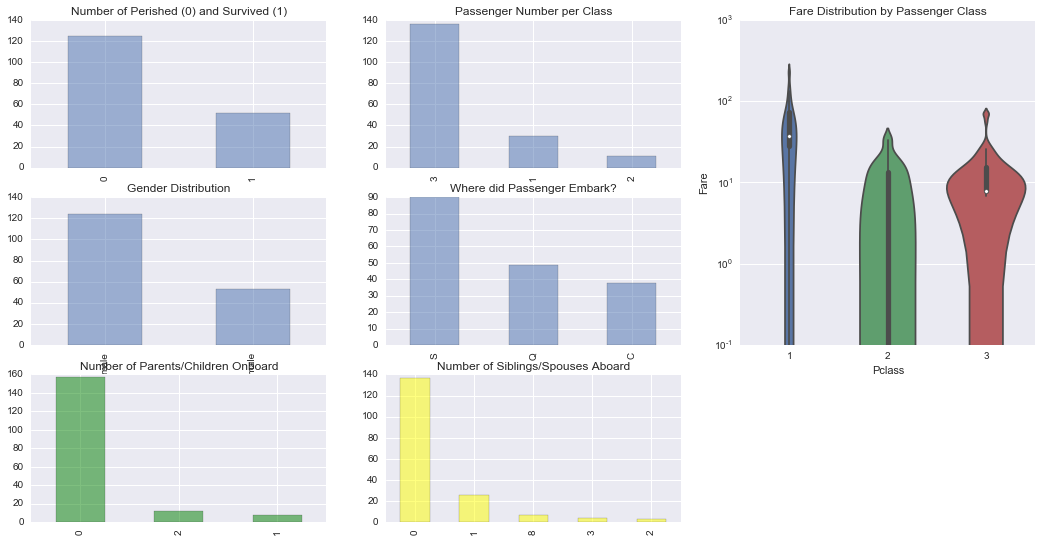

In [10]:
check_age_removal = titanic_original[pd.isnull(titanic_original['Age'])]

# create graphs
fig = plt.figure(figsize = (18,9))
alpha_bar = 0.5

# plot first graph
# Survival Distribution
ax1 = plt.subplot2grid((3,3),(0,0))
check_age_removal["Survived"].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Number of Perished (0) and Survived (1)')

# Plot second graph
# Passenger Class Distribution 
ax2 = plt.subplot2grid((3,3),(0,1))
check_age_removal["Pclass"].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title("Passenger Number per Class")

# plot third graph
# Fare Distribution
ax3 = plt.subplot2grid((3,3), (0,2), rowspan = 2)
sns.violinplot(x = check_age_removal['Pclass'], y = check_age_removal['Fare']).set_yscale('log')
plt.title('Fare Distribution by Passenger Class')

# no age distribution for this dataset. Only NaN values!

# plot fifth graph
ax5 = plt.subplot2grid((3,3), (1,0))
check_age_removal['Sex'].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Gender Distribution')

# plot sixth graph
ax6 = plt.subplot2grid((3,3), (1,1))
check_age_removal['Embarked'].value_counts().plot(kind = 'bar', alpha = alpha_bar)
plt.title('Where did Passenger Embark?')

# plot seventh graph
ax7 = plt.subplot2grid((3,3), (2,0))
check_age_removal['Parch'].value_counts().plot(kind = 'bar', color = 'green', alpha = alpha_bar)
plt.title('Number of Parents/Children Onboard')

# plot eighth graph
ax7 = plt.subplot2grid((3,3), (2,1))
check_age_removal['SibSp'].value_counts().plot(kind = 'bar', color = 'yellow', alpha = alpha_bar)
plt.title('Number of Siblings/Spouses Aboard')

- Comparing these graphs, which show the cleaned data, from those above with all raw data, we notice that the distributions are different. 
    - For example, the survival distribution is similar but different, in the data that has been removed there is disproportionately more 3rd class passengers and the passenger embarkation data isn't representative. 
    - The data that has been removed was slightly different to the data that has been kept. This might have an effect on my final results and is a limitation to keep in mind. 

#### Plotting the data and finding trends

Plot the distribution of ages for survivors and those dead

count    424.000000
mean      30.626179
std       14.172110
min        1.000000
25%       21.000000
50%       28.000000
75%       39.000000
max       74.000000
Name: Age, dtype: float64
count    290.000000
mean      28.343690
std       14.950952
min        0.420000
25%       19.000000
50%       28.000000
75%       36.000000
max       80.000000
Name: Age, dtype: float64


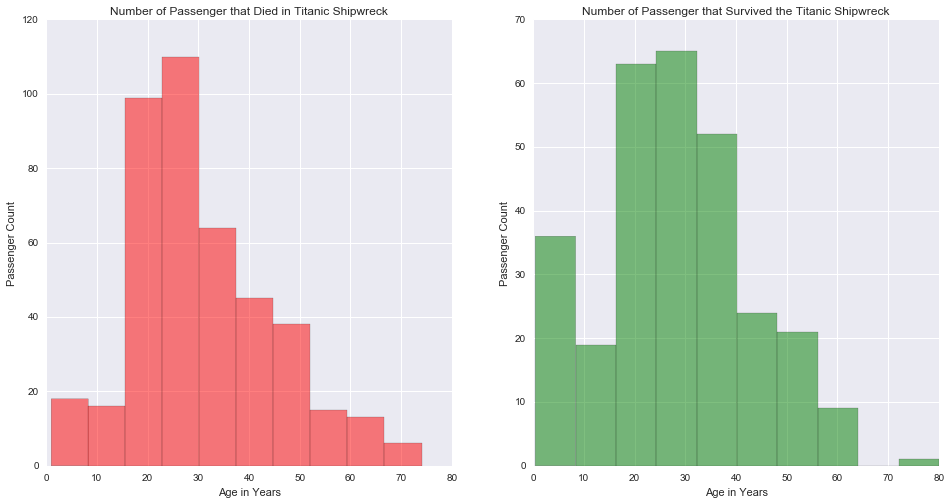

In [11]:
## To credit
## https://discussions.udacity.com/t/titanic-pclass-grouped-data-draw-a-hist/172594/13
## Code below taken from the udacity forum website above

## Note to reviewer:
## I appreciate that this plot will not count for credit as it is lifted form the Udacity Forums.
## I include it as it was the example that made plotting groupby objects stick for me.

## Note that of a total of 891 passengers, age information is avaiable on 424 dead and 290 survivors.
## Age information is missing for 177 passengers. I believe that we have enough passengers here to observe trends 
## in the age distributions of survivors and dead.

import matplotlib.pyplot as plt

# create a figure with 2 subplots
fig,axs = plt.subplots(1,2, figsize = (16,8))
# create groupby object
titanic_gb = titanic.groupby('Survived')
color = ['r', 'g']
# loop over groups and plot them in each axis
for ind, group in titanic_gb:
    group['Age'].plot(kind = 'hist', color = color[ind], ax = axs[ind], alpha = 0.5)
 
axs[0].set_xlabel('Age in Years')
axs[0].set_ylabel('Passenger Count')
axs[0].set_title('Number of Passenger that Died in Titanic Shipwreck')

axs[1].set_xlabel('Age in Years')
axs[1].set_ylabel('Passenger Count')
axs[1].set_title('Number of Passenger that Survived the Titanic Shipwreck')

## print out some statistics
for ind, group in titanic_gb:
    print group['Age'].describe()

#### Comment on Figure Above
The main difference between the shapes of both distributions is in the 0-10 range. This plot shows that significantly more children aged between 0 and 10 survived than perished. This discrepancy might exist because of the priority given to children when assigning places in lifeboats. 

#### Plot the distribution of Passenger Class for Survivors and Dead

Pclass
1    0.655914
2    0.479769
3    0.239437
Name: Survived, dtype: float64

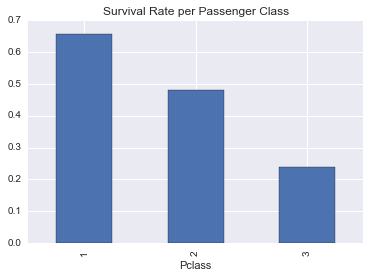

In [12]:
titanic.groupby('Pclass')['Survived'].mean().plot(kind = 'bar', title = 'Survival Rate per Passenger Class')
# Print stats
titanic.groupby('Pclass')['Survived'].mean()

Passengers in different classes had different rates of survival. Let's investigate this further.

#### Plot the distribution of Passenger Class and Gender for Survivors and Dead

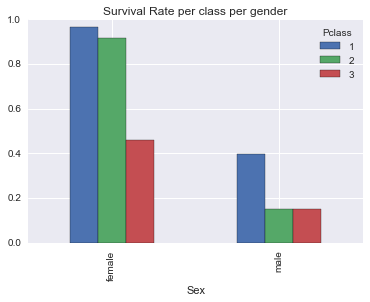

In [13]:
titanic.groupby(['Sex', 'Pclass'])['Survived'].mean().unstack().plot(kind = 'bar', \
                                                                     title = 'Survival Rate per class per gender')


#### So why did passengers in different passenger classes have different rates of survival?
- The plot above shows the survival rate for males and females in all passenger classes. 
- It shows that females had a higher survival rate than males. 
    - This might be because priority was given to females in the lifeboats. 
    - Females in first and class had close to a 100% survival rate. 
- For males, the survival rate in second class was lower than for males in first class, which explains the majority of the decrease in overall survival rate between first and second class. 
- In third class, females have significantly lower survival rate, indicating that perhaps passenger class was important in obtaining a seat in a lifeboat. 

## Section 4: Conclusion
- This analysis has investigated the effect of age, passenger class and sex on survival rate of passengers in the Titanic shipwreck. 
- Effect of Age:
    - Survival rates were similar for most age groups with a noticeable difference for the 0-10 range. This might be because priority was given to children in the lifeboats. 
- Effect of Passenger Class and Sex
    - It was found that passengers in different classes had different rates of survival, with those in a higher class more likely to survive the shipwreck than those in a lower class. 
    - This effect seems to be have been driven by the priority given to females in first and second class who had a very high survival rate. 
    - Females in third class were still given priority, experiencing a survival rate higher than men in first, second or third class, but not to the same extent as females in third class. 
 

 Shortcomings and Limitations of the Analysis
From Wikipedia
    "Titanic's passengers numbered approximately 1,317 people: 324 in First Class, 284 in Second Class, and 709 in Third Class. Of these, 869 (66%) were male and 447 (34%) female. "

- We have a fairly large final cleaned sample of size 714, compared to the population size of 1317. The sample is representative of the population with respect to passenger class and gender distribution, after checking the full dataset on Wikipedia.
- However, this is all that's known. It is possible that the sample is not representative of other properties of the population, such as the fare or SibSP. This would be particularly true were the sample not randomly selected, in which case trends from the dataset might have been removed. 
- In my case, my analysis centred around the sex and Pclass of the passenger which seem to have been well sampled. 
- I therefore do not believe that the missing values would have a significant effect on the results of my analysis particulary given the scale of the effect observed.